In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y.classes_

AttributeError: 'Series' object has no attribute 'classes_'

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [5]:
print(X[:6,:])

[[0.02380952 0.02962963]
 [0.4047619  0.03703704]
 [0.19047619 0.20740741]
 [0.21428571 0.31111111]
 [0.02380952 0.45185185]
 [0.21428571 0.31851852]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)



In [7]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train,y_train)

SVC()

In [8]:
score = svc.score(X_test,y_test)
print("Accuracy of model: ",score)


Accuracy of model:  0.925


In [16]:
y_pred = svc.predict(X_test)
svc.classes_

array([0, 1], dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[47,  5],
       [ 1, 27]], dtype=int64)

Text(50.72222222222221, 0.5, 'Predicted values')

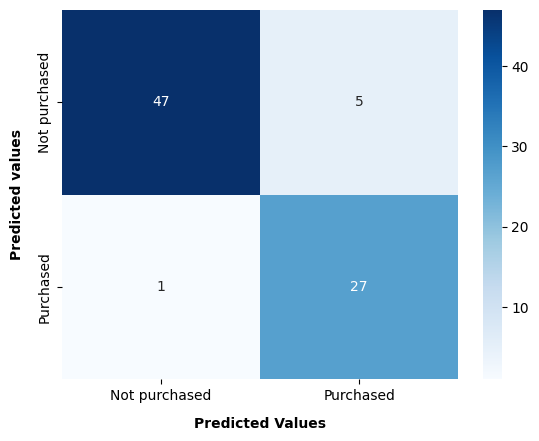

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm,annot=True, cmap = 'Blues', xticklabels = ['Not purchased', 'Purchased'], yticklabels=['Not purchased', 'Purchased'])
plt.xlabel("Predicted Values", fontweight='bold', labelpad = 10)
plt.ylabel("Actual values", fontweight = 'bold', labelpad = 10)

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Precision score: ",precision_score(y_test,y_pred))
print("Recall score: ",recall_score(y_test,y_pred))
print("F1  score: ",f1_score(y_test,y_pred))

Accuracy score:  0.925
Precision score:  0.84375
Recall score:  0.9642857142857143
F1  score:  0.8999999999999999


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80

